In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
train_data=pd.read_csv("C:\\Users\\aarus\\Downloads\\titanic\\train.csv", usecols=['Age','Fare','Survived'])
test_data=pd.read_csv("C:\\Users\\aarus\\Downloads\\titanic\\test.csv")

# Analysis on the Training data

In [46]:
train_data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
train_data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [48]:
train_data.shape

(891, 3)

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [50]:
df=pd.DataFrame(train_data)

In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
X=df.drop(columns=['Survived'])

In [53]:
y=df['Survived']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
X_train_imputed=X_train['Age']

In [58]:
null_mask = X_train['Age'].isnull()

# Generate a list of non-null age values
non_null_ages = X_train['Age'].dropna()

# Use np.random.choice to fill null values with random values from non-null ages
X_train.loc[null_mask, 'Age'] = np.random.choice(non_null_ages, null_mask.sum())

In [61]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

In [62]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

C:\Users\aarus\AppData\Local\Temp\ipykernel_13448\468893779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

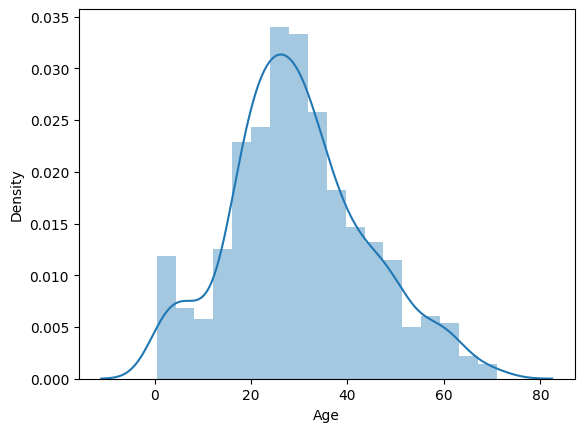

In [67]:
sns.distplot(X_train['Age'])

C:\Users\aarus\AppData\Local\Temp\ipykernel_13448\4243102321.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], ax=ax,hist=False)
C:\Users\aarus\AppData\Local\Temp\ipykernel_13448\4243102321.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax=ax, 

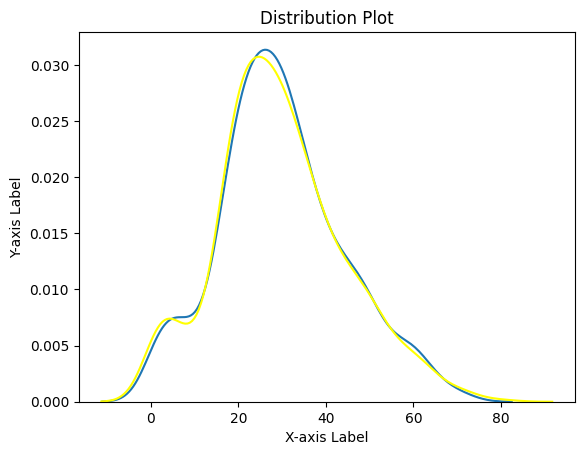

In [72]:
fig,ax=plt.subplots()

sns.distplot(X_train['Age'], ax=ax,hist=False)

# Create a new distplot just above the first one with a different color
sns.distplot(df['Age'], ax=ax, color='yellow',hist=False)

# Optionally, add labels or other customizations
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Distribution Plot')

# Display the plot
plt.show()

# Data Visualisation Part

**1.countplot**: This plot gives the 'count' of a particular column. The value given in the hue property gives the count of that property

Text(0.5, 1.0, 'Survived VS Dead according to Pclass')

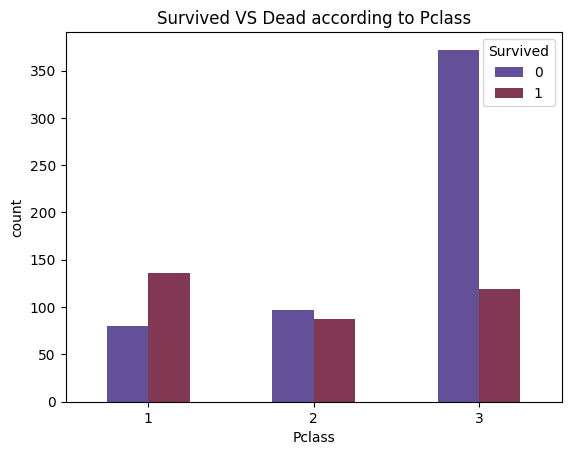

In [10]:
sns.countplot(x=df['Pclass'],data=df,width=0.5,hue=df['Survived'], palette='twilight')
plt.title("Survived VS Dead according to Pclass") #hue_order: If you only want specific columns

<Axes: xlabel='Age', ylabel='Parch'>

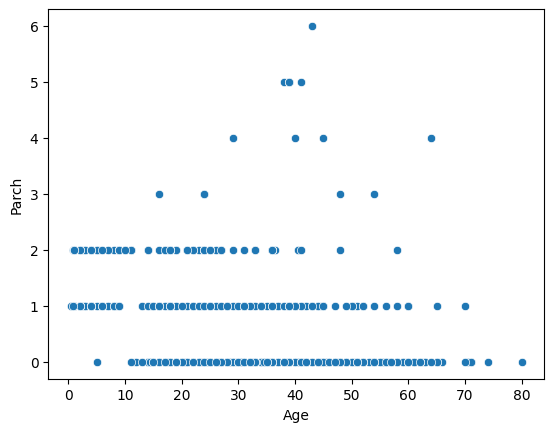

In [20]:
sns.scatterplot(x=df['Age'],y=df['Parch'])

<Axes: xlabel='Age', ylabel='Count'>

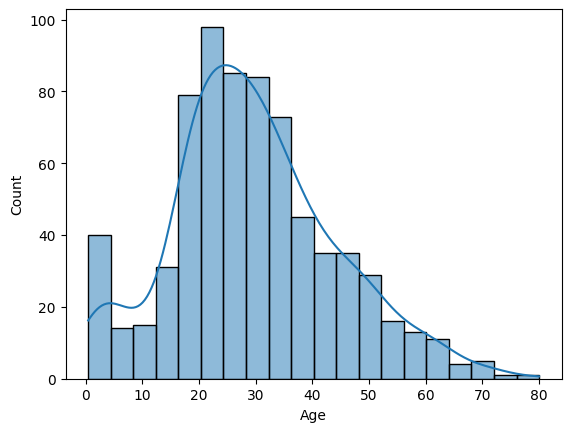

In [11]:
sns.histplot(x=df['Age'],bins=20,kde=True,stat='count')

<Axes: xlabel='SibSp', ylabel='count'>

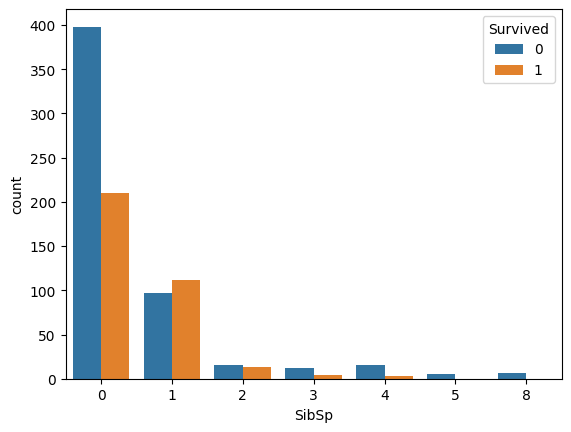

In [12]:
sns.countplot(x='SibSp',hue='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

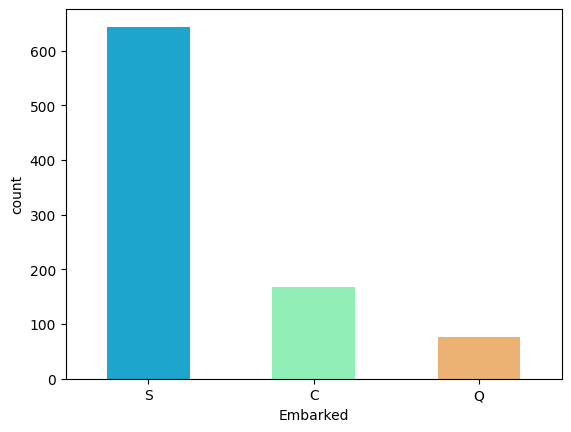

In [13]:
sns.countplot(x=df['Embarked'],palette='rainbow',width=0.5)

<Axes: xlabel='Embarked', ylabel='Survived'>

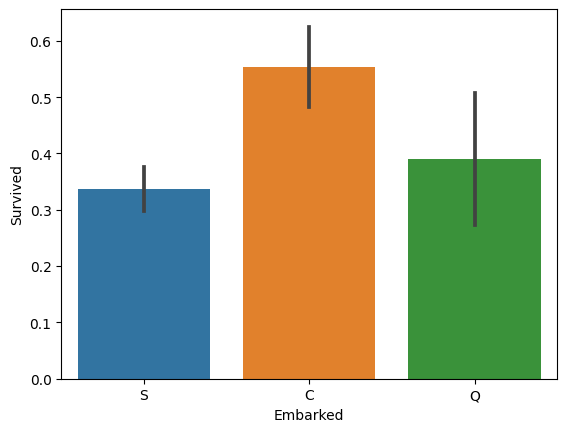

In [14]:
sns.barplot(y=df['Survived'],x=df['Embarked'])

#### From the above visualisation it's clear that
- The chances of survival for people who embarked at Cherbough are more
- SouthHampton and Queenstown has closer relations

<Axes: xlabel='Fare', ylabel='Count'>

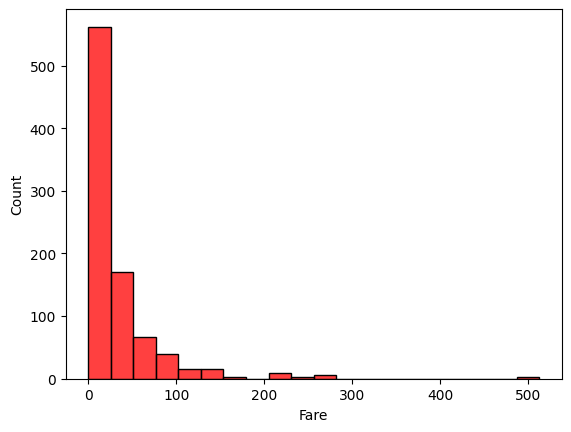

In [15]:
sns.histplot(x=df['Fare'],bins=20,color='red')

2.**Heatmap**: To find relation among different values

# Data Cleaning 
- Heatmap depicting null values in training dataset
- Boxplot for depicting outliers in the age column

<Axes: >

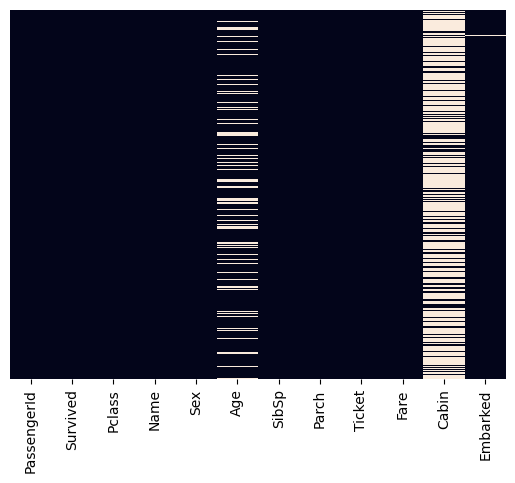

In [16]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

**3.Boxplot:** Helps in finding the outliers in the column

Text(0.5, 1.0, 'Boxplot')

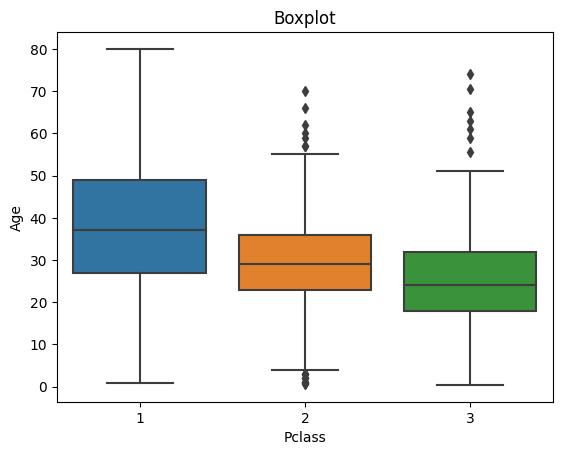

In [21]:
sns.boxplot(x=df['Pclass'],y=df['Age'])
plt.title("Boxplot")

#### Filling in the empty age values

In [22]:
for i in df['Pclass']: 
    for j in df['Age']:
        if(i==1 and pd.isna(j)):
            df['Age']=df['Age'].replace(np.nan,38)
        if(i==2 and pd.isna(j)):
            df['Age']=df['Age'].replace(np.nan
                                        ,29)
        if(i==3 and pd.isna(j)):
            df['Age']=df['Age'].replace(np.nan,24)



In [23]:
per_null=(df['Cabin'].isnull().sum())/891
per_null

0.7710437710437711

**Since around 77% data is missing in this column, it is difficult to fill the empty values**  so we should drop this column

**Convert the categorical features into numerical features in both test and train data**

## 1. Using dummies

In [24]:
embarked=pd.get_dummies(df['Embarked'],dtype=int,drop_first=True) #We drop the first column to prevent multicollinearity
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pclass=pd.get_dummies(df['Pclass'],dtype=int)
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [26]:
for i in df['Sex']:
    if(i=="male"):
        df['Sex']=df['Sex'].replace("male",1)
    if(i=="female"):
        df['Sex']=df['Sex'].replace("female",0)

In [27]:
df=pd.concat([df,embarked,pclass],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


In [28]:
Y=df['Survived']  #Splitting data into Target column

In [29]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
X=df.drop(['PassengerId','Survived','Pclass','Name','Ticket','Cabin','Embarked'],axis=1)  #Splitting data to Features

In [31]:
X.isnull().sum()

Sex      0
Age      0
SibSp    0
Parch    0
Fare     0
Q        0
S        0
1        0
2        0
3        0
dtype: int64

In [32]:
X.isnull().sum()

Sex      0
Age      0
SibSp    0
Parch    0
Fare     0
Q        0
S        0
1        0
2        0
3        0
dtype: int64

# Operations on Test data

In [33]:
df_test=pd.DataFrame(test_data)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
emb=pd.get_dummies(df_test['Embarked'],dtype=int,drop_first=True)
emb.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [35]:
PClass=pd.get_dummies(df_test['Pclass'],dtype=int)
PClass.head()

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [36]:
for i in df_test['Pclass']: #test data 
    for j in df_test['Age']:
        if(i==1 and pd.isna(j)):
            df_test['Age']=df_test['Age'].replace(np.nan,38)
        if(i==2 and pd.isna(j)):
            df_test['Age']=df_test['Age'].replace(np.nan
                                        ,29)
        if(i==3 and pd.isna(j)):
            df_test['Age']=df_test['Age'].replace(np.nan,24)

In [37]:
for i in df_test['Sex']:
    if(i=="male"):
        df_test['Sex']=df_test['Sex'].replace("male",1)
    if(i=="female"):
        df_test['Sex']=df_test['Sex'].replace("female",0)

In [38]:
df_test['Fare']=df_test['Fare'].replace(np.nan,df['Fare'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [39]:
df_test=pd.concat([df_test,emb,PClass],axis=1)

In [40]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,1,2,3
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,NaN,S,0,1,0,0,1


In [41]:
df_test=df_test.drop(['PassengerId','Pclass','Name','Ticket','Cabin','Embarked'],axis=1)

In [42]:
df_test

,Sex,Age,SibSp,Parch,Fare,Q,S,1,2,3
0,1,34.5,0,0,7.8292,1,0,0,0,1
1,0,47.0,1,0,7.0000,0,1,0,0,1
2,1,62.0,0,0,9.6875,1,0,0,1,0
3,1,27.0,0,0,8.6625,0,1,0,0,1
4,0,22.0,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1,24.0,0,0,8.0500,0,1,0,0,1
414,0,39.0,0,0,108.9000,0,0,1,0,0
415,1,38.5,0,0,7.2500,0,1,0,0,1
416,1,24.0,0,0,8.0500,0,1,0,0,1


# Model Creation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)

RandomForestClassifier(max_depth=5, random_state=1)

In [53]:
prediction=model.predict(X_test)

In [54]:
df_Random=pd.DataFrame()

In [55]:
df_Random['PassengerId']=test_data['PassengerId']
df_Random['Survived']=prediction

In [56]:
df_Random.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [57]:
df_Random.reset_index(drop=True, inplace=True)
df_Random.set_index('PassengerId', inplace=True) 

In [58]:
df_Random.to_csv("RandomForest.csv")

In [60]:
from sklearn.model_selection import train_test_split

df["Embarked"] = [0 if i == "S" else i for i in df["Embarked"]] 
df["Embarked"] = [2 if i == "C" else i for i in df["Embarked"]] 
df["Embarked"] = [1 if i == "Q" else i for i in df["Embarked"]] 

df_test=pd.DataFrame(test_data) 
df_test["Embarked"] = [0 if i == "S" else i for i in df_test["Embarked"]] 
df_test["Embarked"] = [1 if i == "C" else i for i in df_test["Embarked"]] 
df_test["Embarked"] = [2 if i == "Q" else i for i in df_test["Embarked"]] 
 
    
    
#It is not advisable to assign values to categorical columns like this because of multicollinearity/ model might think
#that there is a closer relation between S and C rather and not a close relation between S and Q, and may give wrong predictions
#So we should perform one hot encoding.


In [61]:
x_train,y_train,x_test,y_test=train_test_split(X,Y,test_size=0.2)

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [45]:
 X.columns = X.columns.astype(str) #We need to convert DataTypes of all columns to string as LogisticRegression takes str inputs

In [64]:
model=lr.fit(X,Y)

In [47]:
X_test=df_test  #Assign the test

In [48]:
X_test.columns = X_test.columns.astype(str)

In [67]:
prediction=lr.predict(X_test)

C:\Users\aarus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [68]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
result_df=pd.DataFrame()

In [70]:
result_df

""


In [71]:
result_df['PassengerId']=test_data['PassengerId']

In [72]:
result_df['Survived']=prediction

In [73]:
result_df.reset_index(drop=True, inplace=True)
result_df.set_index('PassengerId', inplace=True)  #Since we have to make the Id as index

In [74]:
result_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,0
1307,0


# Breaking down the working of the model

In [116]:
w0=model.intercept_[0]
w0

2.2012649907315183

In [104]:
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10=model.coef_[0]

In [78]:
#Prediction based on w0 and coefficients obtained

In [85]:
Feature_names=["Sex","Age","SibSp","Parch","Fare","Q","S","1","2","3"]

In [92]:
prob=X_test.iloc[45][Feature_names].values.reshape(1,-1)

In [95]:
y=model.predict_proba(prob)

C:\Users\aarus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [100]:
print("Predicted value:",y[0][0])

Predicted value: 0.8946156128464782


In [102]:
print("actual value:",result_df.iloc[45])

actual value: Survived    0
Name: 937, dtype: int64


# Most important Feature

In [105]:
w=[w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]

In [106]:
w

[-2.5893910054950515,
 -0.035139967055491196,
 -0.30074574824103417,
 -0.0784923774539004,
 0.002953579826570136,
 -0.08882417050164153,
 -0.3941182817060152,
 1.489147641387017,
 0.6952703987218793,
 -0.5014432947745414]

In [107]:
Feature_importance=pd.DataFrame(Feature_names,columns=["Features"])

In [108]:
import math

In [112]:
Feature_importance['Importance']=pow(math.e,np.array(w))

In [114]:
Feature_importance.sort_values(by="Importance")

,Features,Importance
0,Sex,0.075066
9,3,0.605656
6,S,0.674274
2,SibSp,0.740266
5,Q,0.915006
3,Parch,0.924509
1,Age,0.965470
4,Fare,1.002958
8,2,2.004251
7,1,4.433315


## Save the DataFrame as a csv

In [75]:
result_df.to_csv('TitanicPrediction.csv')

# KNN Algorithm

In [223]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X, Y) 

KNeighborsClassifier()

In [224]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [225]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [226]:
df_KNN=pd.DataFrame()

In [227]:
df_KNN

""


In [228]:
df_KNN['PassengerId']=test_data['PassengerId']

In [229]:
df_KNN['Survived']=y_pred

In [230]:
df_KNN

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [231]:
df_KNN.reset_index(drop=True, inplace=True)
df_KNN.set_index('PassengerId', inplace=True) 

In [232]:
df_KNN

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0


In [234]:
df_KNN.to_csv("TitanicPredictionKNN.csv")

# decision tree model

In [52]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [53]:
X=std.fit_transform(X)
X_test=std.fit_transform(X_test)

In [34]:
from sklearn import tree

In [35]:
model=tree.DecisionTreeClassifier()

In [36]:
model.fit(X,Y)

DecisionTreeClassifier()

In [45]:
survived=model.predict(X_test)

In [39]:
df_tree=pd.DataFrame()

In [43]:
df_tree['PassengerId']=test_data['PassengerId']

In [44]:
df_tree

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [47]:
df_tree['Survived']=survived

In [48]:
df_tree

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
df_tree.reset_index(drop=True, inplace=True)
df_tree.set_index('PassengerId', inplace=True) 

In [50]:
df_tree

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [51]:
df_tree.to_csv("DecisionTreeTitanic.csv")

In [12]:
df=pd.DataFrame(train_data)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(714, 3)

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [23]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

NameError: name 'X_train' is not defined